In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from scipy.stats import pearsonr
import math

In [2]:
df_nobel = pd.read_csv("nobel_per_capita.csv", delimiter="\t")

<Axes: ylabel='Entity'>

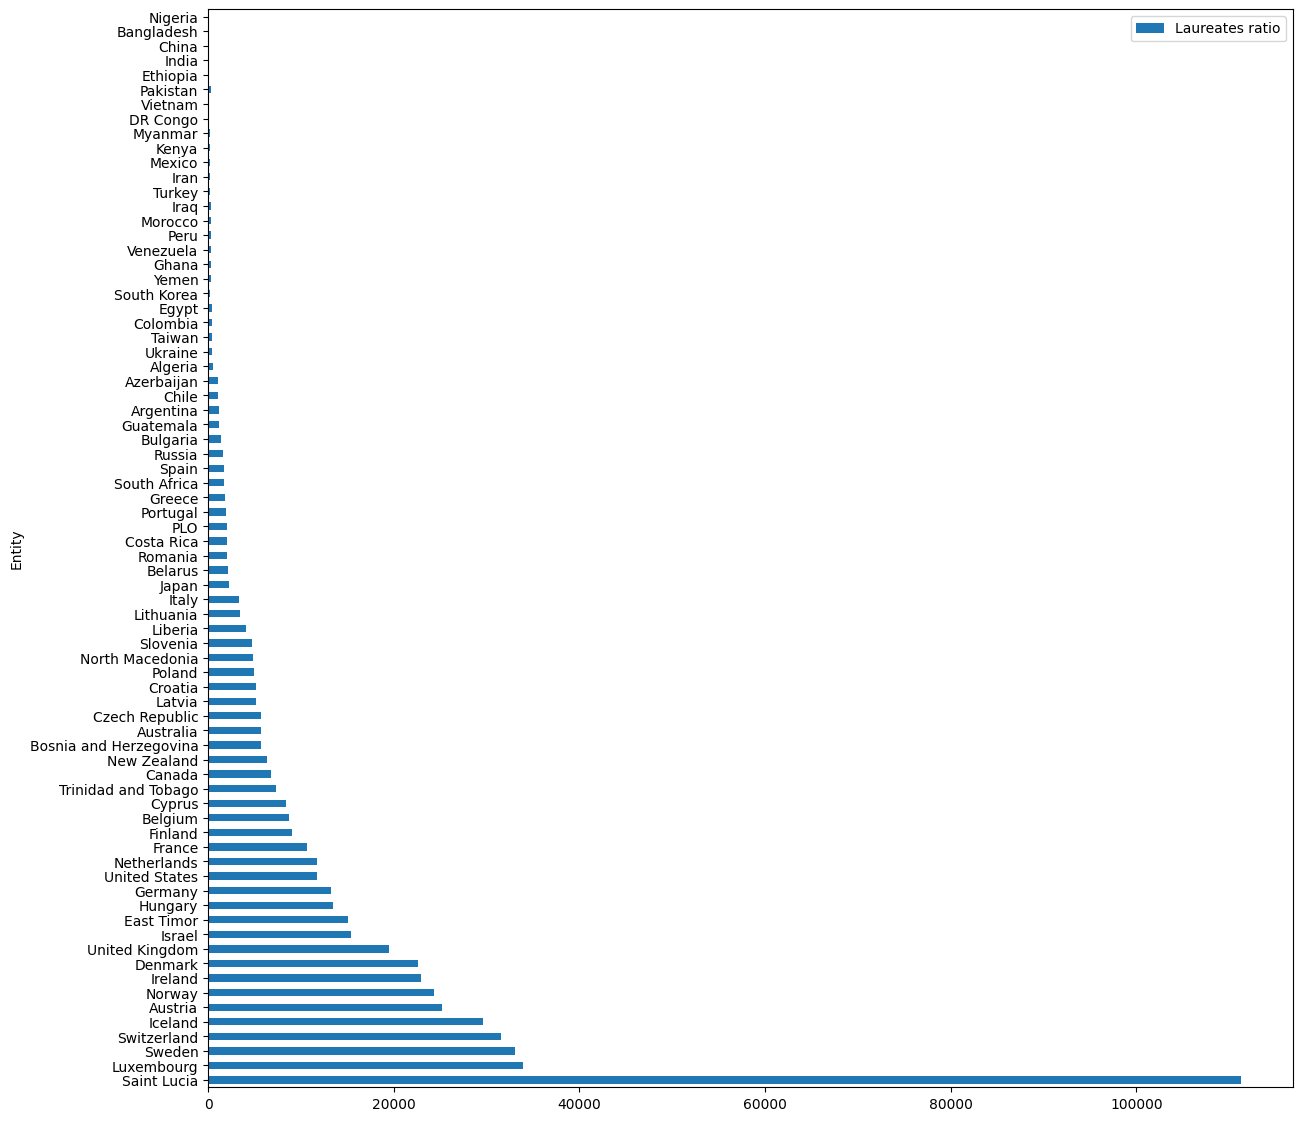

In [3]:
df_nobel.plot(x="Entity", y="Laureates ratio", kind="barh", figsize=(14,14))


In [4]:
# Cocoa beans consumption in kilograms per year per capita
df_cocoa_raw = pd.read_csv("chocolate_consumption_per_capita.csv")

## Preprocess the dataset

* pivot on year column
* replace NA by 0
* rename country according to the laureates dataframe

In [5]:
df_cocoa = df_cocoa_raw.pivot(index="Entity", columns="Year", values="Cocoa")
df_cocoa = df_cocoa.fillna(0.0)

# Czechia => Czech Republic
# Democratic Republic of Congo => DR Congo
# Timor => East Timor
# PLO => Palestin
df_cocoa.rename(
    index={
        "Czechia": "Czech Republic",
        "Democratic Republic of Congo": "DR Congo",
        "Timor": "East Timor",
    }, inplace=True)

In [6]:
nobel_entities = set(df_nobel["Entity"].unique().tolist())
cocoa_entities = set(df_cocoa.index.unique().tolist())
common_entities = nobel_entities.intersection(cocoa_entities)

<Axes: ylabel='Entity'>

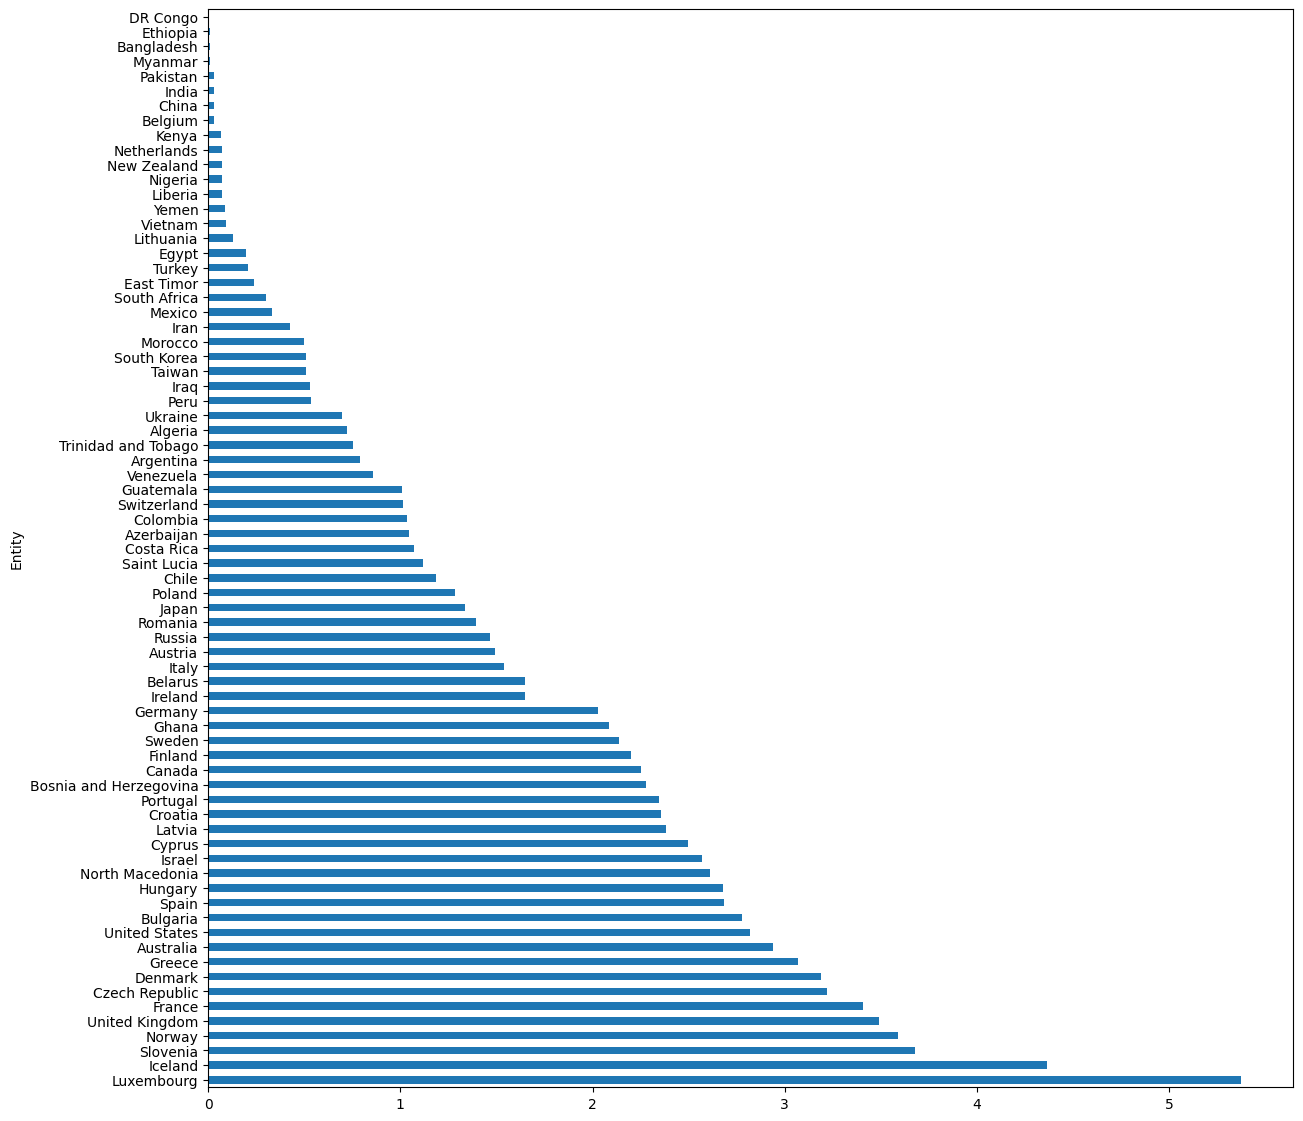

In [7]:
df_cocoa.loc[list(common_entities),2009].sort_values(ascending=False).plot(x="Entity", y="Cocoa", kind="barh", figsize=(14,14))

In [8]:
df_cocoa_2009 = df_cocoa.loc[list(common_entities),2009]
df_nobel_2015 = df_nobel[df_nobel["Entity"].isin(list(common_entities))]
df = pd.merge(df_cocoa_2009, df_nobel_2015, how="inner", on="Entity")
df = df.rename(columns={2009: "Cocoa"})

In [9]:
df_cocoa_ts = df_cocoa.loc[list(common_entities),:].T
df_cocoa_ts.index = pd.to_datetime(df_cocoa_ts.index, format="%Y")

In [22]:
df["Entity"]

0             Belarus
1     North Macedonia
2              Sweden
3      Czech Republic
4            Colombia
           ...       
68            Austria
69             Poland
70              Ghana
71            Hungary
72             Greece
Name: Entity, Length: 73, dtype: object

<Axes: xlabel='Chocolate consumption', ylabel='Nobel laureates per capita'>

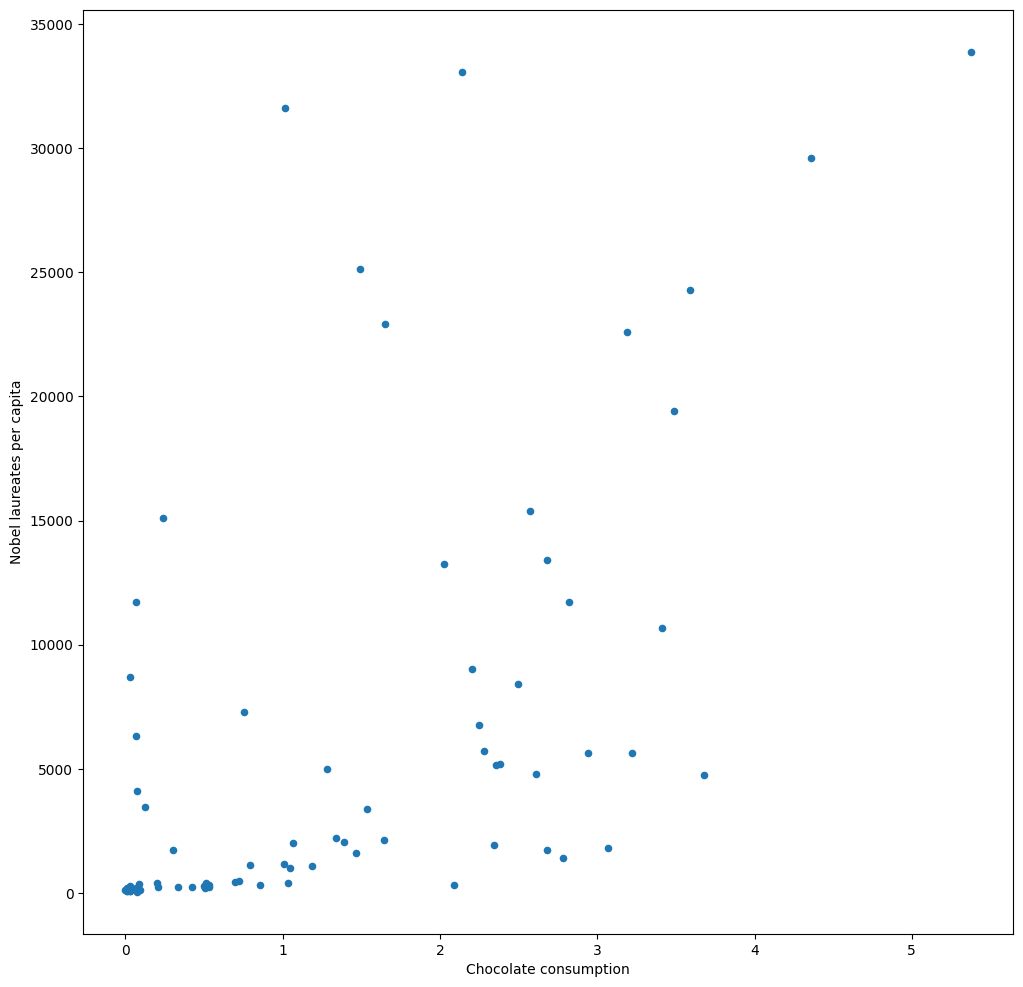

In [21]:
df[df["Entity"] != "Saint Lucia"].rename(
    columns={"Laureates ratio": "Nobel laureates per capita", "Cocoa": "Chocolate consumption"}
).plot(x="Chocolate consumption", y="Nobel laureates per capita", kind="scatter", figsize=(12,12))

In [12]:
x = df[df["Entity"] != "Saint Lucia"][["Cocoa"]]
y = df[df["Entity"] != "Saint Lucia"][["Laureates ratio"]]
linear_regression = linear_model.LinearRegression()
linear_regression.fit(x,y)

print(linear_regression.coef_, linear_regression.intercept_)

r_squared = linear_regression.score(x, y)
print(r_squared, math.sqrt(r_squared))

[[3928.25393087]] [850.19860975]
0.31531534617704193 0.5615294704439313


In [29]:
df[["Cocoa", "Laureates ratio"]].corr(method="pearson")

,Cocoa,Laureates ratio
Cocoa,1.000000,0.306176
Laureates ratio,0.306176,1.000000


In [30]:
df[["Cocoa", "Laureates ratio"]].corr(method="spearman")

,Cocoa,Laureates ratio
Cocoa,1.00000,0.65393
Laureates ratio,0.65393,1.00000


In [31]:
p_result = pearsonr(x.values.ravel(), y.values.ravel())
p_result

PearsonRResult(statistic=0.5615294704439312, pvalue=2.8733166817211184e-07)

In [28]:
p_ci = p_result.confidence_interval(confidence_level=0.95)
p_ci

ConfidenceInterval(low=0.3791891449162939, high=0.7018900479086979)